In [2]:
# 기본 import
import tensorflow 
import matplotlib.pyplot as plt
%matplotlib inline
# fashion-MNIST 데이터 import
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
# Keras MODEL 구축 import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
# Keras MODEL 시각화 import
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot 

# # 무시
# from jupyterthemes import jtplot 
# jtplot.style()

# 1. 데이터 생성

In [8]:
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 클래스 갯수 
nb_classes = 10

# 데이터 전처리
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train[0])

# one-hot encoding
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

# training set & validate set 
X_val = X_train[50000:]
X_train = X_train[:50000]
Y_val = Y_train[50000:]
Y_train = Y_train[:50000]

print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)
print('X_val:', X_val.shape)
print('Y_val:', Y_val.shape)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

# 2. 모델 구축

In [6]:
singlelayer_model = Sequential()
# Dense
singlelayer_model.add(Dense(units=10, input_dim=28*28))
singlelayer_model.add(Activation('softmax'))

# 모델 컴파일 -> loss function, optimizer 설정
singlelayer_model.compile(loss='categorical_crossentropy', 
                 optimizer='adam', 
                 metrics=['accuracy']) # 모델의 평가 기준

'''
2진 분류 -> 'binary_crossentropy'
3개 이상 분류 -> 'categorical_crossentropy'
''' 

print(singlelayer_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


## 2-1 SVG 모듈을 활용하여 모델 구성 확인

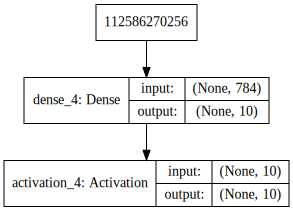

In [48]:
SVG(model_to_dot(singlelayer_model, show_shapes=True).create(prog='dot', format='svg'))

# 3. 모델 학습

In [9]:
epochs = 10

singlelayer_model.fit(X_train.reshape((-1,28*28)), Y_train, epochs=epochs, batch_size=32,
                          validation_data=(X_val.reshape((-1,28*28)), Y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 79us/step - loss: 0.6201 - acc: 0.7935 - val_loss: 0.5245 - val_acc: 0.8127
Epoch 2/10
50000/50000 [==============================] - 3s 67us/step - loss: 0.4700 - acc: 0.8396 - val_loss: 0.4588 - val_acc: 0.8403
Epoch 3/10
50000/50000 [==============================] - 3s 68us/step - loss: 0.4412 - acc: 0.8488 - val_loss: 0.4443 - val_acc: 0.8483
Epoch 4/10
50000/50000 [==============================] - 3s 68us/step - loss: 0.4257 - acc: 0.8533 - val_loss: 0.4310 - val_acc: 0.8513
Epoch 5/10
50000/50000 [==============================] - 3s 68us/step - loss: 0.4162 - acc: 0.8569 - val_loss: 0.4225 - val_acc: 0.8551
Epoch 6/10
50000/50000 [==============================] - 3s 68us/step - loss: 0.4086 - acc: 0.8591 - val_loss: 0.4332 - val_acc: 0.8477
Epoch 7/10
50000/50000 [==============================] - 3s 68us/step - loss: 0.4041 - acc: 0.8599 - val_loss: 0.4207 - val_acc

# 4. 모델 평가하기

In [50]:
loss_and_metrics = singlelayer_model.evaluate(X_test.reshape((-1,28*28)),
                                              Y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

10000/10000 [==============================] - 0s 25us/step

loss_and_metrics : [0.45170498106479645, 0.8432]


In [10]:
a =2 

In [11]:
a

2

In [12]:
a= 2

2
